In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2, imageio
from tqdm import tqdm
import pandas as pd
from skimage import morphology as morph
from skimage import filters
from skimage import io
from scipy import ndimage

import warnings
warnings.filterwarnings('ignore')

#import utils as ut
plt.set_cmap(cmap=mpl.cm.gray);

<Figure size 432x288 with 0 Axes>

In [2]:
#%% Pmat Dataset

#indexes_supine = [1, 8, 9, 10, 11, 12, 15, 16, 17]
indexes_all = np.arange(1,17)

subject = 10
index = 1
fn = 'PmatData/experiment-i/S{}/{}.txt'.format(subject,index)
img_csv = np.genfromtxt(fn)
n_frames,_ = img_csv.shape

# to get size of the read file
print(img_csv.shape)

(82, 2048)


Min: 0.00; Mean: 10.71; Max: 255.00


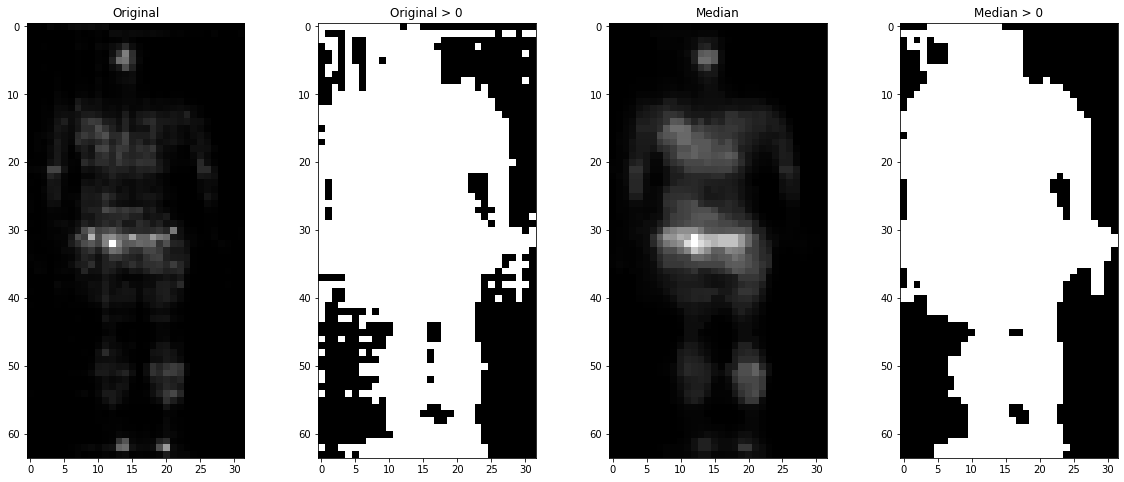

In [3]:
img_frame = img_csv[50,:].reshape((64,32))
# normalization
img_frame = (img_frame / np.max(img_frame)) * 255

img_frame_f = filters.median(img_frame, mode='constant', cval=0)

plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.imshow(img_frame)
plt.title('Original')
plt.subplot(1,4,2)
plt.imshow(img_frame > 0)
plt.title('Original > 0')
plt.subplot(1,4,3)
plt.title('Median')
plt.imshow(img_frame_f)
plt.subplot(1,4,4)
plt.imshow(img_frame_f > 0)
plt.title('Median > 0')
print('Min: {:.2f}; Mean: {:.2f}; Max: {:.2f}'.format(np.min(img_frame), np.mean(img_frame), np.max(img_frame)))

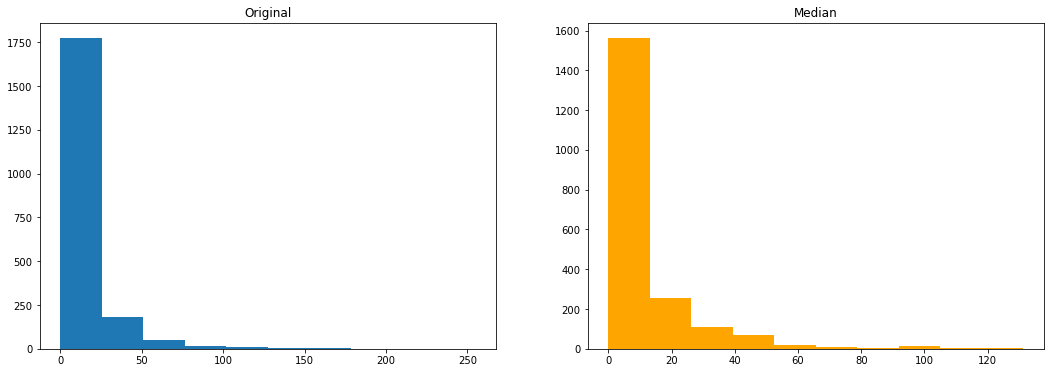

In [4]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.hist(img_frame.ravel())
plt.title('Original')
plt.subplot(1,2,2)
plt.hist(img_frame_f.ravel(), color='orange');
plt.title('Median');

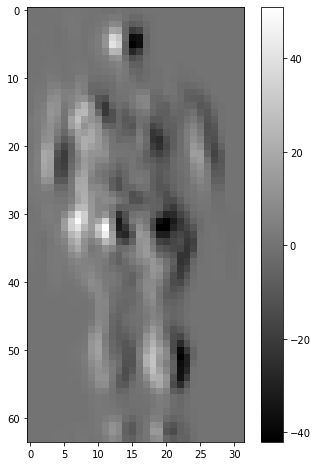

In [5]:
angle_sobel = filters.sobel_v(img_frame_f)


plt.figure(figsize=(6,8))
plt.imshow(angle_sobel, cmap=plt.cm.gray)
plt.colorbar()#ticks=[0, 0.01, 0.02]);

(32,)
(64,)
14


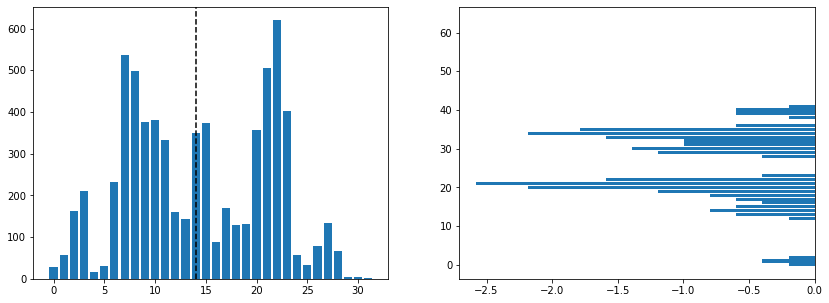

In [6]:


# horizontal and vertical profiles
img_r = np.abs(np.sum(angle_sobel, axis=0, keepdims=True).ravel())
print(np.shape(img_r))
img_c = np.sum(angle_sobel, axis=1, keepdims=True).ravel()
print(np.shape(img_c))

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.bar(np.arange(len(img_r)), height=img_r)
val = filters.threshold_otsu(hist=img_r)
print(val)
plt.axvline(val, color='k', ls='--')

plt.subplot(1,2,2)
plt.barh(np.arange(len(img_c)), width=img_c);
#plt.axes.invert_yaxis()



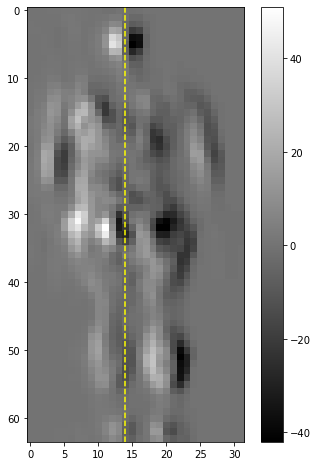

In [7]:
plt.figure(figsize=(6,8))
plt.imshow(angle_sobel, cmap=plt.cm.gray)
plt.axvline(val, color='yellow', ls='--')
plt.colorbar()

In [8]:
r,c = img_frame.shape

all_frame = img_csv.T.reshape((64,32, n_frames))
all_frame.shape

(64, 32, 82)

In [9]:
left = all_frame[:, 0:val, :]
right = all_frame[:, val:, :]

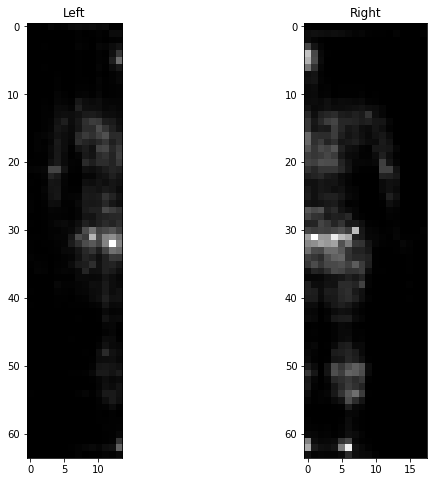

In [10]:
plt.figure(figsize=(20,8))

plt.subplot(1,4,1)
plt.imshow(left[:,:,50])
plt.title('Left')
plt.subplot(1,4,2)
plt.imshow(right[:,:,50])
plt.title('Right');

In [11]:
from scipy.stats import entropy

left_mu = np.mean(left, axis=2)
right_mu = np.mean(right, axis=2)

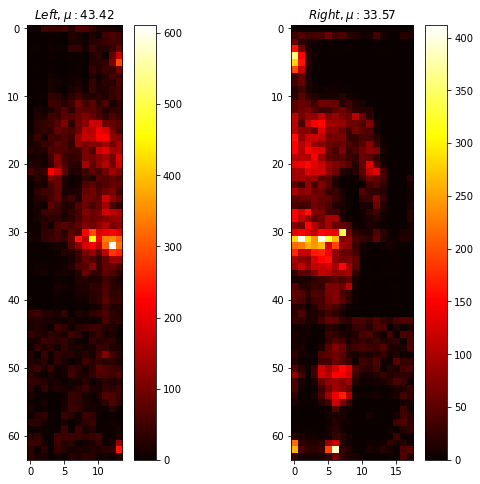

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,4,1)
plt.imshow(left_mu, cmap=plt.cm.hot)
plt.title('$Left, \mu: {:.2f}$'.format(np.mean(left_mu)))
plt.colorbar();

plt.subplot(1,4,2)
plt.imshow(right_mu, cmap=plt.cm.hot)
plt.title('$Right, \mu: {:.2f}$'.format(np.mean(right_mu)));
plt.colorbar();

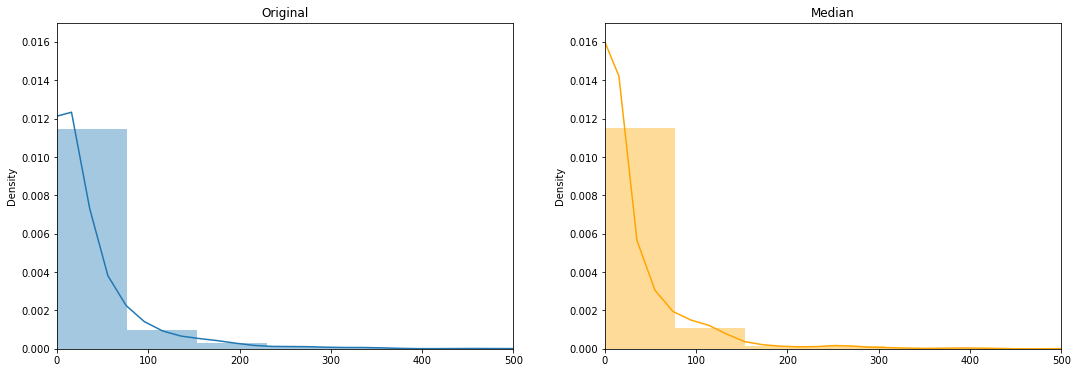

In [13]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.distplot(left.ravel())
plt.xlim([0,500])
plt.ylim([0,0.017])
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(right.ravel(), color='orange');
plt.xlim([0,500])
plt.ylim([0,0.017])
plt.title('Median');